# Explore here

In [97]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datos_c=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
datos_c.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [98]:
#guardado en la capeta
datos_c.to_csv("../data/raw/datos.csv",index=False)

In [99]:
#1-planteamiento del problema y recopilacion de datos 
#2-exploracion y limpieza de los datos
#3-analisis de variables univariantes
#4-analisis de variables multivariables
#5-ing. de caracteristicas 
#6-seleccion de caracteristicas


#entonces queremos saber el precio de una propiedad de airbnb en NY



In [100]:
#ahora limpiaremos los datos
datos_c.shape #nos dice la dimencion del DF
datos_c.info()
datos_c.duplicated("id").sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

np.int64(0)

In [101]:
#elminar columnas inutiles
datos_c.drop(['id',"name","host_name"],axis=1,inplace=True)
datos_c.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


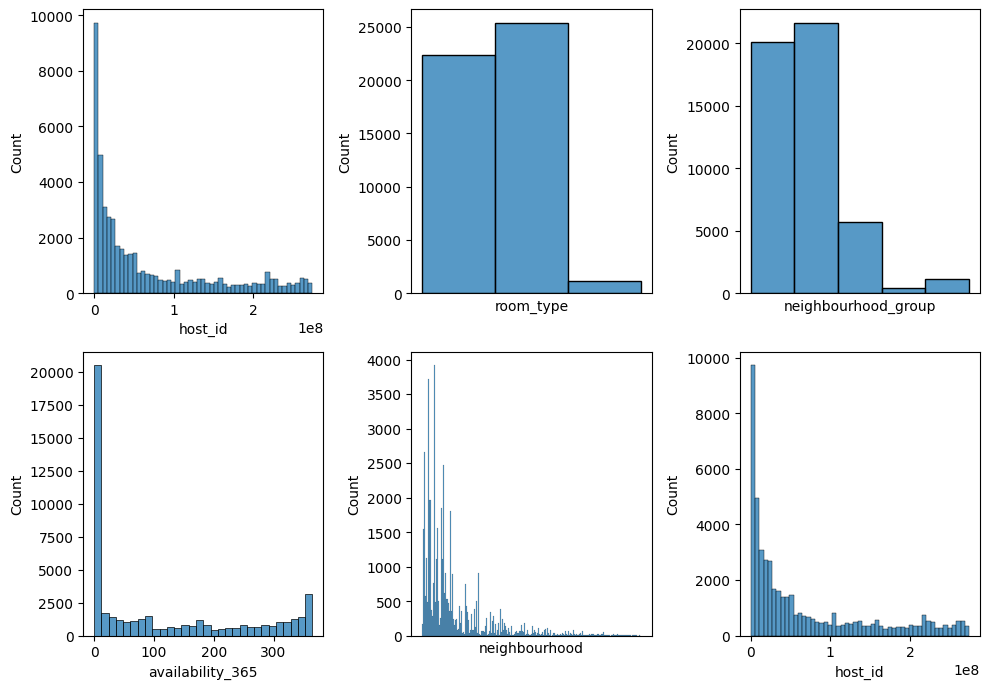

In [102]:
#analisis de variables univariantes
import seaborn as sns

fig, axis=plt.subplots(2,3,figsize=(10,7))
sns.histplot(ax=axis[0,0],data=datos_c,x="host_id")
sns.histplot(ax=axis[0,1],data=datos_c,x="room_type").set_xticks([])
sns.histplot(ax=axis[1,0],data=datos_c,x="availability_365")
sns.histplot(ax=axis[1,1],data=datos_c,x="neighbourhood").set_xticks([])
sns.histplot(ax=axis[0,2],data=datos_c,x="neighbourhood_group").set_xticks([])
sns.histplot(ax=axis[1,2],data=datos_c,x="host_id")

plt.tight_layout()
plt.show()

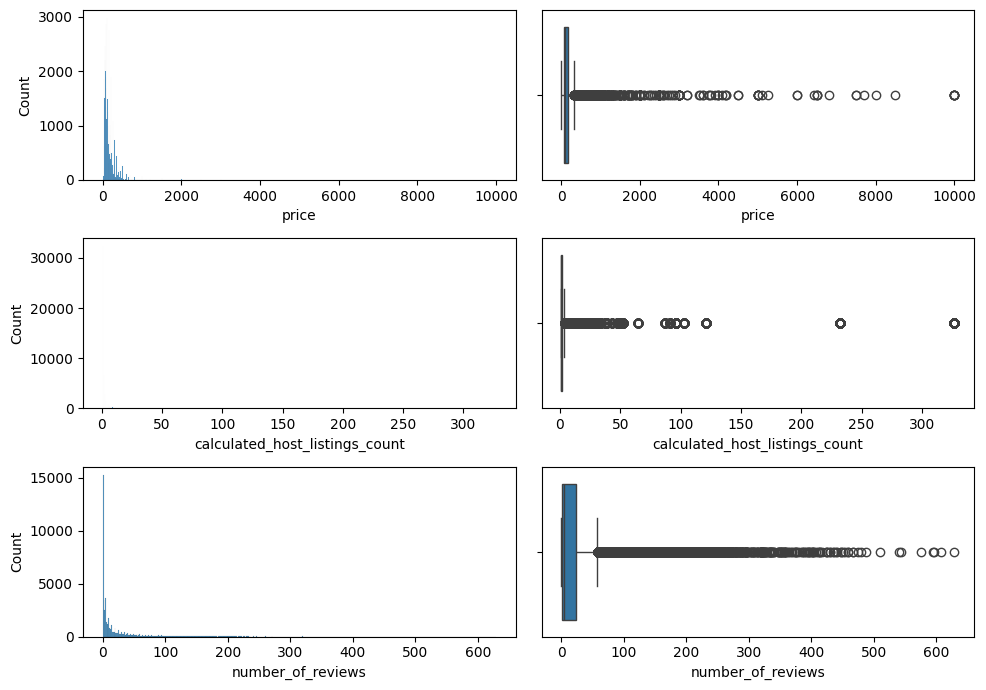

In [103]:
#analisis de variables numericas 
fig, axis=plt.subplots(3,2,figsize=(10,7))
sns.histplot(ax=axis[0,0],data=datos_c,x="price")
sns.boxplot(ax=axis[0,1],data=datos_c,x="price")

sns.histplot(ax=axis[1,0],data=datos_c,x="calculated_host_listings_count")
sns.boxplot(ax=axis[1,1],data=datos_c,x="calculated_host_listings_count")

sns.histplot(ax=axis[2,0],data=datos_c,x="number_of_reviews")
sns.boxplot(ax=axis[2,1],data=datos_c,x="number_of_reviews")
plt.tight_layout()
plt.show()
